In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/adityavikrammahendru/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


# Perform logistic regression on breast cancer data
- Find the Co-relation matrix
- Accuracy
- Precision
- Recall/sensitivity
- F1 Score
- False positive Rate
- True Positive rate
- ROC curve


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)

# Load dataset
df = pd.read_csv(path + "/breast-cancer.csv")





In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
# Drop ID column (not useful for ML)
df.drop("id", axis=1, inplace=True)

# Encode target variable
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Split features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

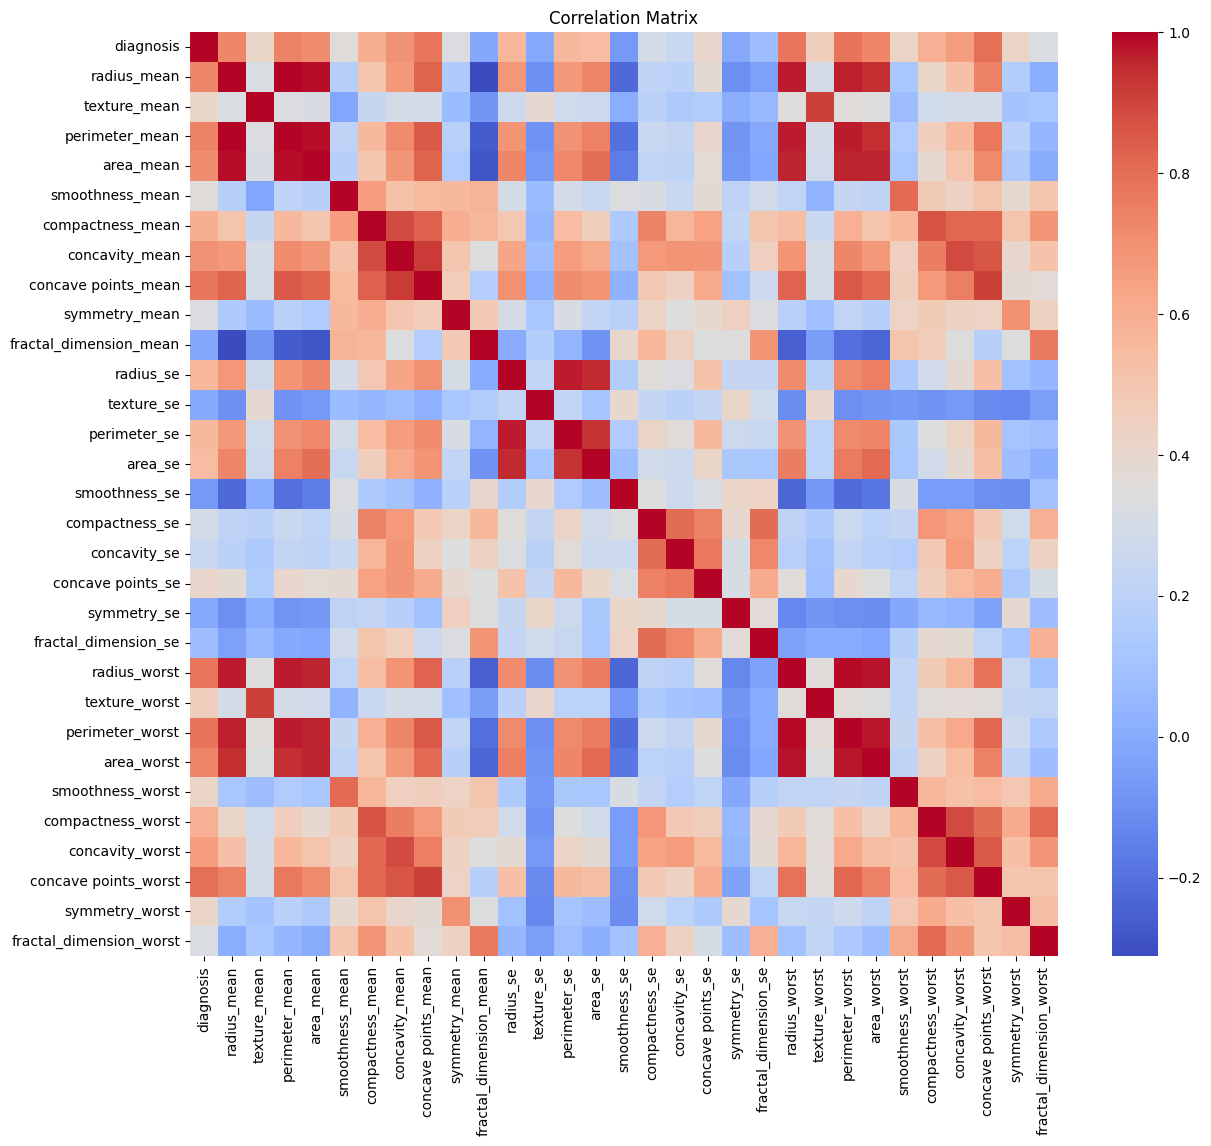

In [12]:
# Correlation Matrix

plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [13]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Logistic Regression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [15]:
# Metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)       # Sensitivity
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)



In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall / Sensitivity: 0.9534883720930233
F1 Score: 0.9647058823529412
False Positive Rate: 0.014084507042253521
True Positive Rate: 0.9534883720930233
AUC: 0.99737962659679


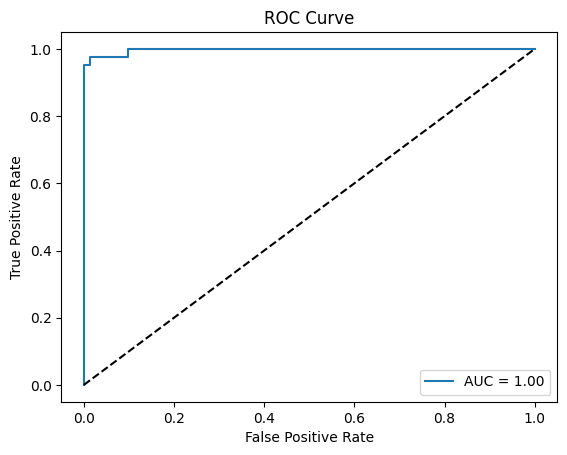

In [ ]:
# Output

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall or Sensitivity:", recall)
print("F1 Score:", f1)
print("False Positive Rate:", false_positive_rate)
print("True Positive Rate:", true_positive_rate)
print("AUC:", roc_auc)

# ROC Plot
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
